https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html

In [1]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='/tmp/Cora', name='Cora')

Processing...
Done!


In [2]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

In [3]:
data

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [4]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float (pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.7920


In [22]:
coragraph = to_networkx(data)
nx.info(coragraph)

'Name: \nType: DiGraph\nNumber of nodes: 2708\nNumber of edges: 10556\nAverage in degree:   3.8981\nAverage out degree:   3.8981'

# EDA 1

In [5]:
data

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [6]:
data.y

tensor([3, 4, 4,  ..., 3, 3, 3])

In [7]:
print(data.edge_index)

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])


In [8]:
from torch_geometric.utils.convert import to_networkx
from torch_geometric.utils.convert import to_scipy_sparse_matrix

In [9]:
coragraph = to_networkx(data)
node_labels = data.y[list(coragraph.nodes)].numpy()

In [10]:
coragraph

In [11]:
node_labels

array([3, 4, 4, ..., 3, 3, 3])

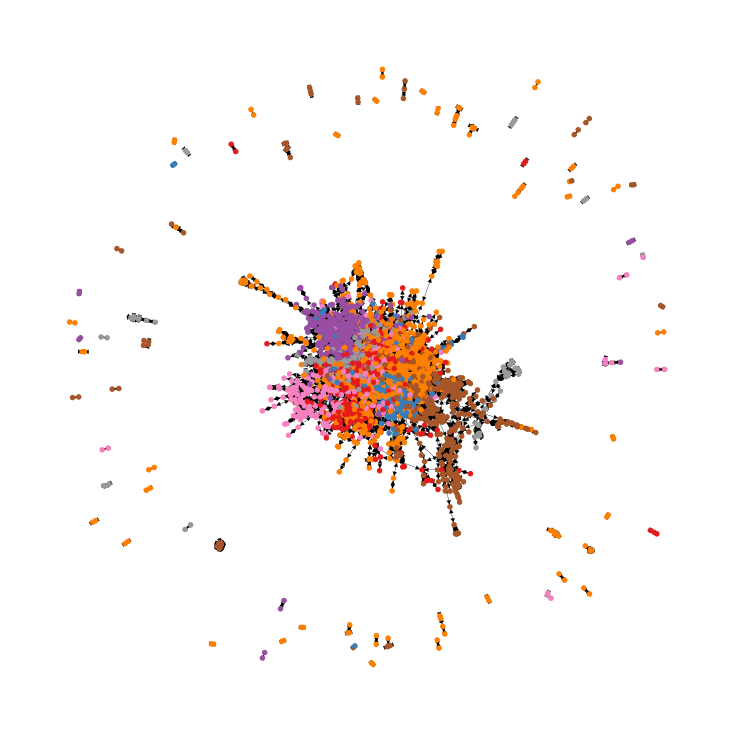

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
plt.figure(1,figsize=(10,10)) 
nx.draw(coragraph, cmap=plt.get_cmap('Set1'),node_color = node_labels,node_size=20,width=0.2)
plt.show()

In [16]:
import pandas as pd
import numpy as np
import networkx as nx
df = nx.to_pandas_adjacency(coragraph)
df_edge = nx.to_pandas_edgelist(coragraph)

In [21]:
nx.info(coragraph)

'Name: \nType: DiGraph\nNumber of nodes: 2708\nNumber of edges: 10556\nAverage in degree:   3.8981\nAverage out degree:   3.8981'

In [31]:
df

,0,1,2,3,4,5,6,7,8,9,...,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
df_edge

,source,target
0,0,633
1,0,1862
2,0,2582
3,1,2
4,1,652
...,...,...
10551,2706,2707
10552,2707,165
10553,2707,598
10554,2707,1473


# EDA2

In [55]:
#https://github.com/CVxTz/graph_classification/blob/master/code/eda.py

In [26]:
from collections import Counter, defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from random import shuffle
import json

dataset = "cora"
edges_path = "../pytorch_cora_citation/%s/%s.cites"%(dataset, dataset)
content_path = "../pytorch_cora_citation/%s/%s.content"%(dataset, dataset)

In [59]:
with open(content_path, "r") as f:
    content_lines = [l.split() for l in f.read().split("\n") if l]

with open(edges_path, "r") as f:
    edges_lines = [l.split() for l in f.read().split("\n") if l]


In [60]:
all_nodes = list(set([x for l in edges_lines for x in l]))

content_data = [{"node":l[0],
                 "features":[float(x) for x in l[1:-1]],
                 "label":l[-1]} for l in content_lines]
labels = [x['label'] for x in content_data]

class_int_mapping = {k: i for i, k in enumerate(Counter(labels))}
node_int_mapping = {k:i for i, k in enumerate(all_nodes)}
node_int_class_mapping = {node_int_mapping[c['node']]: class_int_mapping[c['label']] for c in content_data}
node_class_mapping = {c['node']: class_int_mapping[c['label']] for c in content_data}


In [61]:
colors = ['r', 'g', 'k', 'y', 'm', 'c', 'w', 'b']

nodes = list(range(len(node_int_mapping)))
node_color = [colors[node_int_class_mapping.get(n, -1)%8] for n in nodes]
G=nx.Graph()

for node, int_node in node_int_mapping.items():
    G.add_node(int_node)

for edge in edges_lines:
    G.add_edge(node_int_mapping[edge[0]], node_int_mapping[edge[1]])



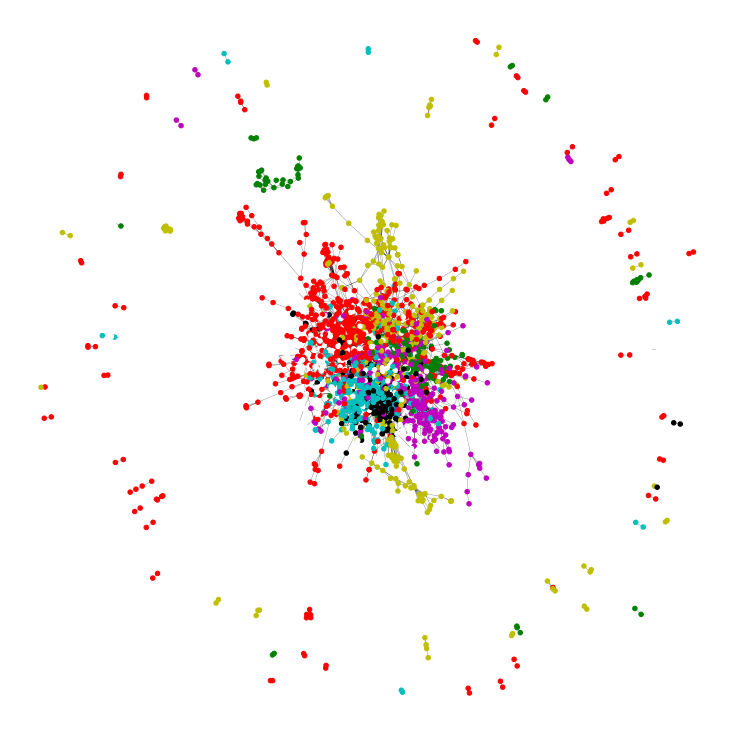

In [65]:
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=20, width=0.2, nodelist=nodes, node_color=node_color)
plt.savefig('graph.png', transparent=True)

In [62]:
spl = dict(nx.all_pairs_shortest_path_length(G))

print(spl)

shuffle(content_data)

train_samples = []
train_class_counter = defaultdict(int)
val_samples = []
val_counter = 0
test_samples = []

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [63]:
for c in content_data:
    if train_class_counter[c['label']] <20:
        train_samples.append(c)
        train_class_counter[c['label']] += 1
    elif val_counter < 500:
        val_samples.append(c)
        val_counter += 1
    else:
        test_samples.append(c)

print(len(train_samples), len(val_samples), len(test_samples))



140 500 2068
